In [ ]:
from google.colab import drive
#mount drive here
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import required libs
import os
import zipfile

import pathlib
import os
import glob as gb
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import metrics
from tensorflow.keras.metrics import Precision, Recall

# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import seaborn as sns

In [ ]:
# Define the path to the zip file and the extraction directory
zip_File = "/content/drive/MyDrive/Dataset_plant.zip"
extract_dir_destination = "/content"

# Check if the zip file exists
if os.path.exists(zip_File):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_File, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir_destination)
        print(f"Successfully extracted '{zip_File}' to '{extract_dir_destination}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_File}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_File}' does not exist.")

Successfully extracted '/content/drive/MyDrive/Dataset_plant.zip' to '/content'


In [ ]:
# Directories
train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
# Image size and batch size
size = 224
batch_size = 128

In [ ]:
# Data Augmentation, Image Preprocessing, Data Generators for Training, Validation, and Testing

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.1
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(size, size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(size, size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(size, size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 63282 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
## To see labels
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

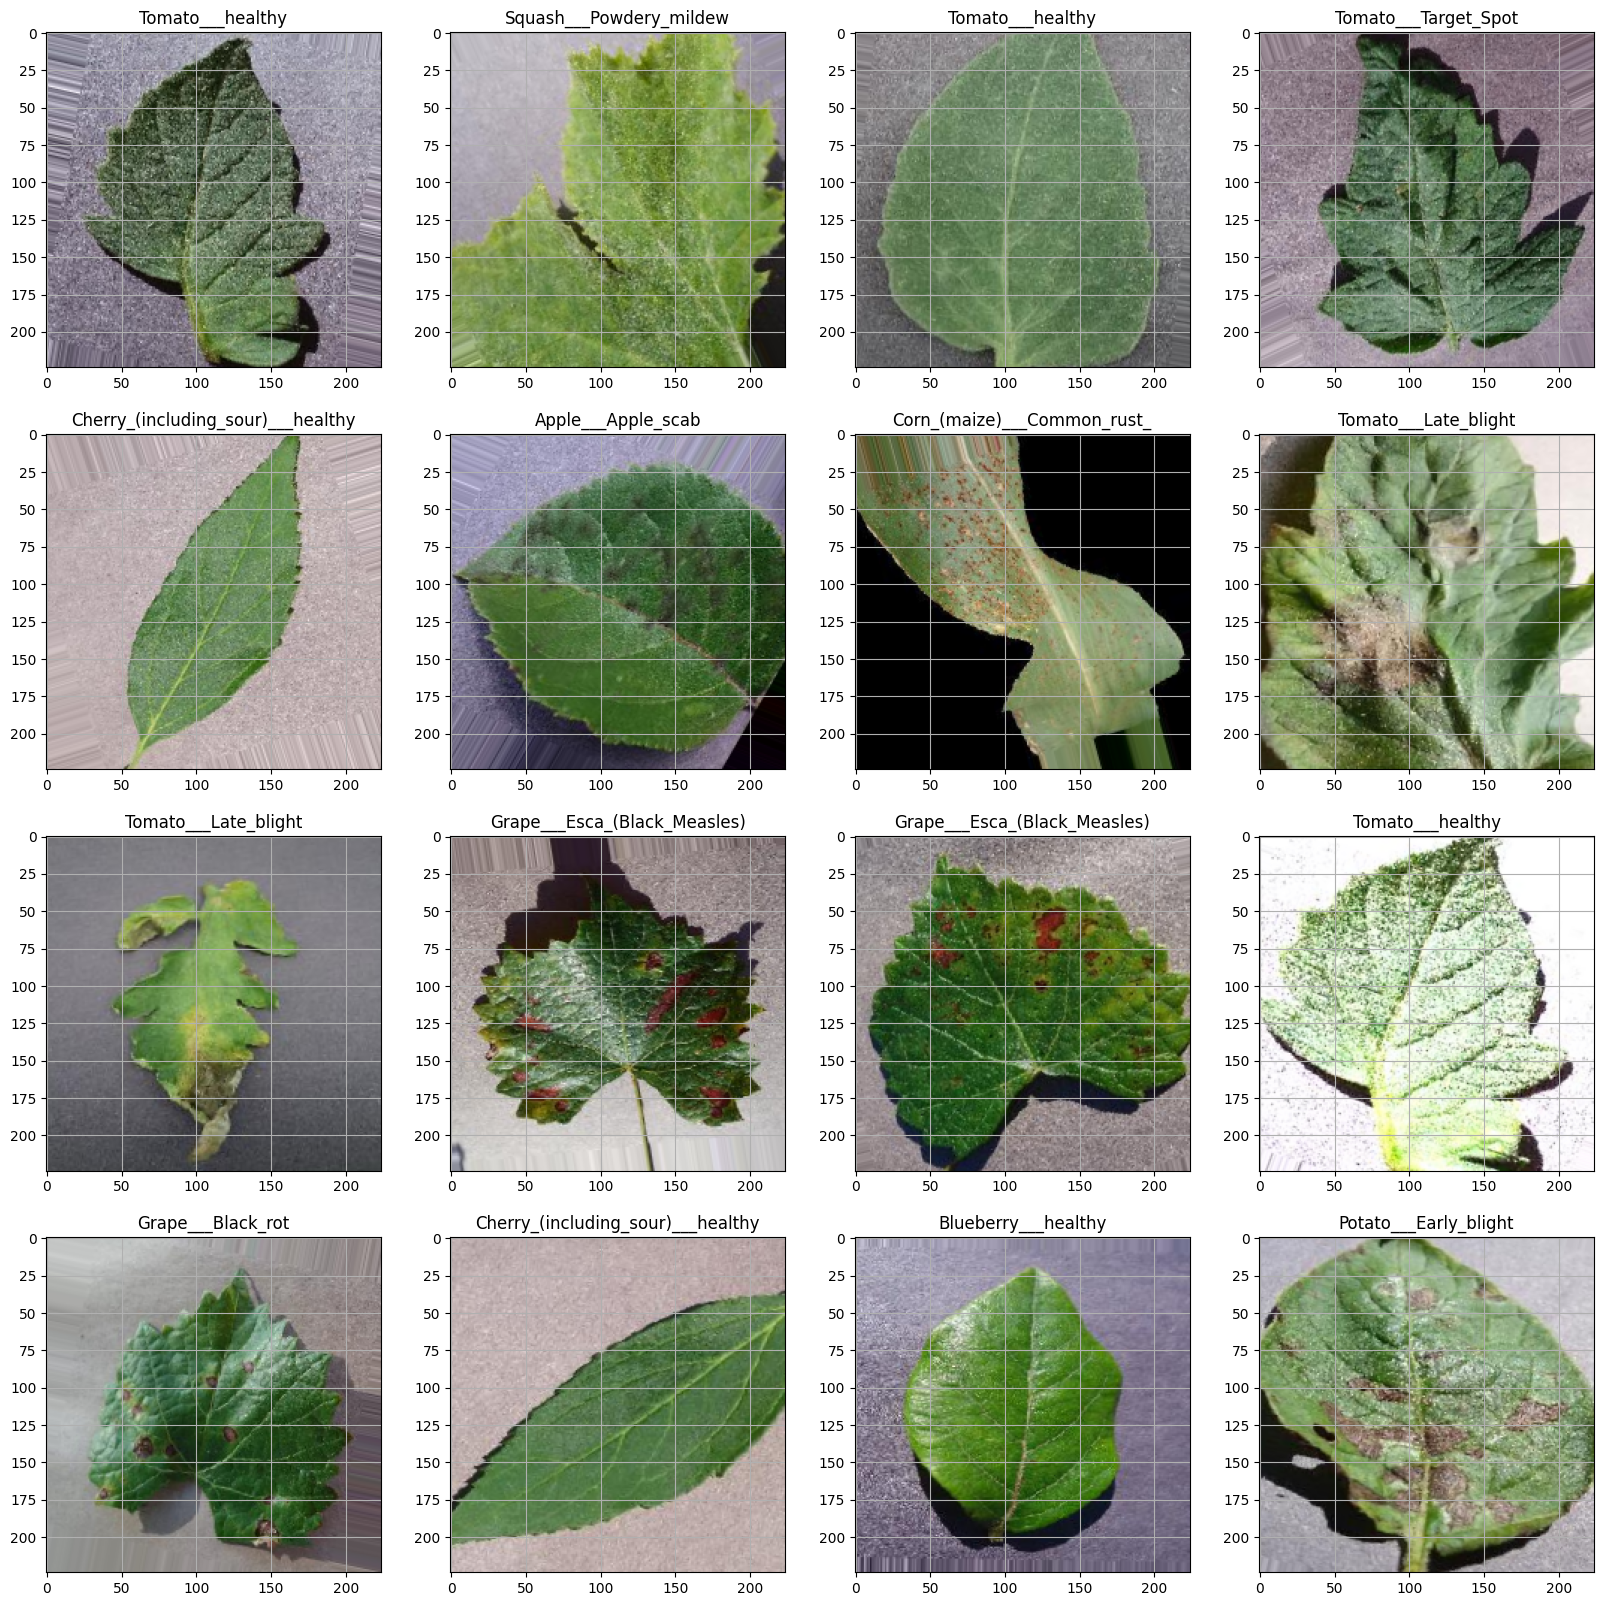

In [ ]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        #plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break    #to stop the loop after displaying one batch of images from the training set

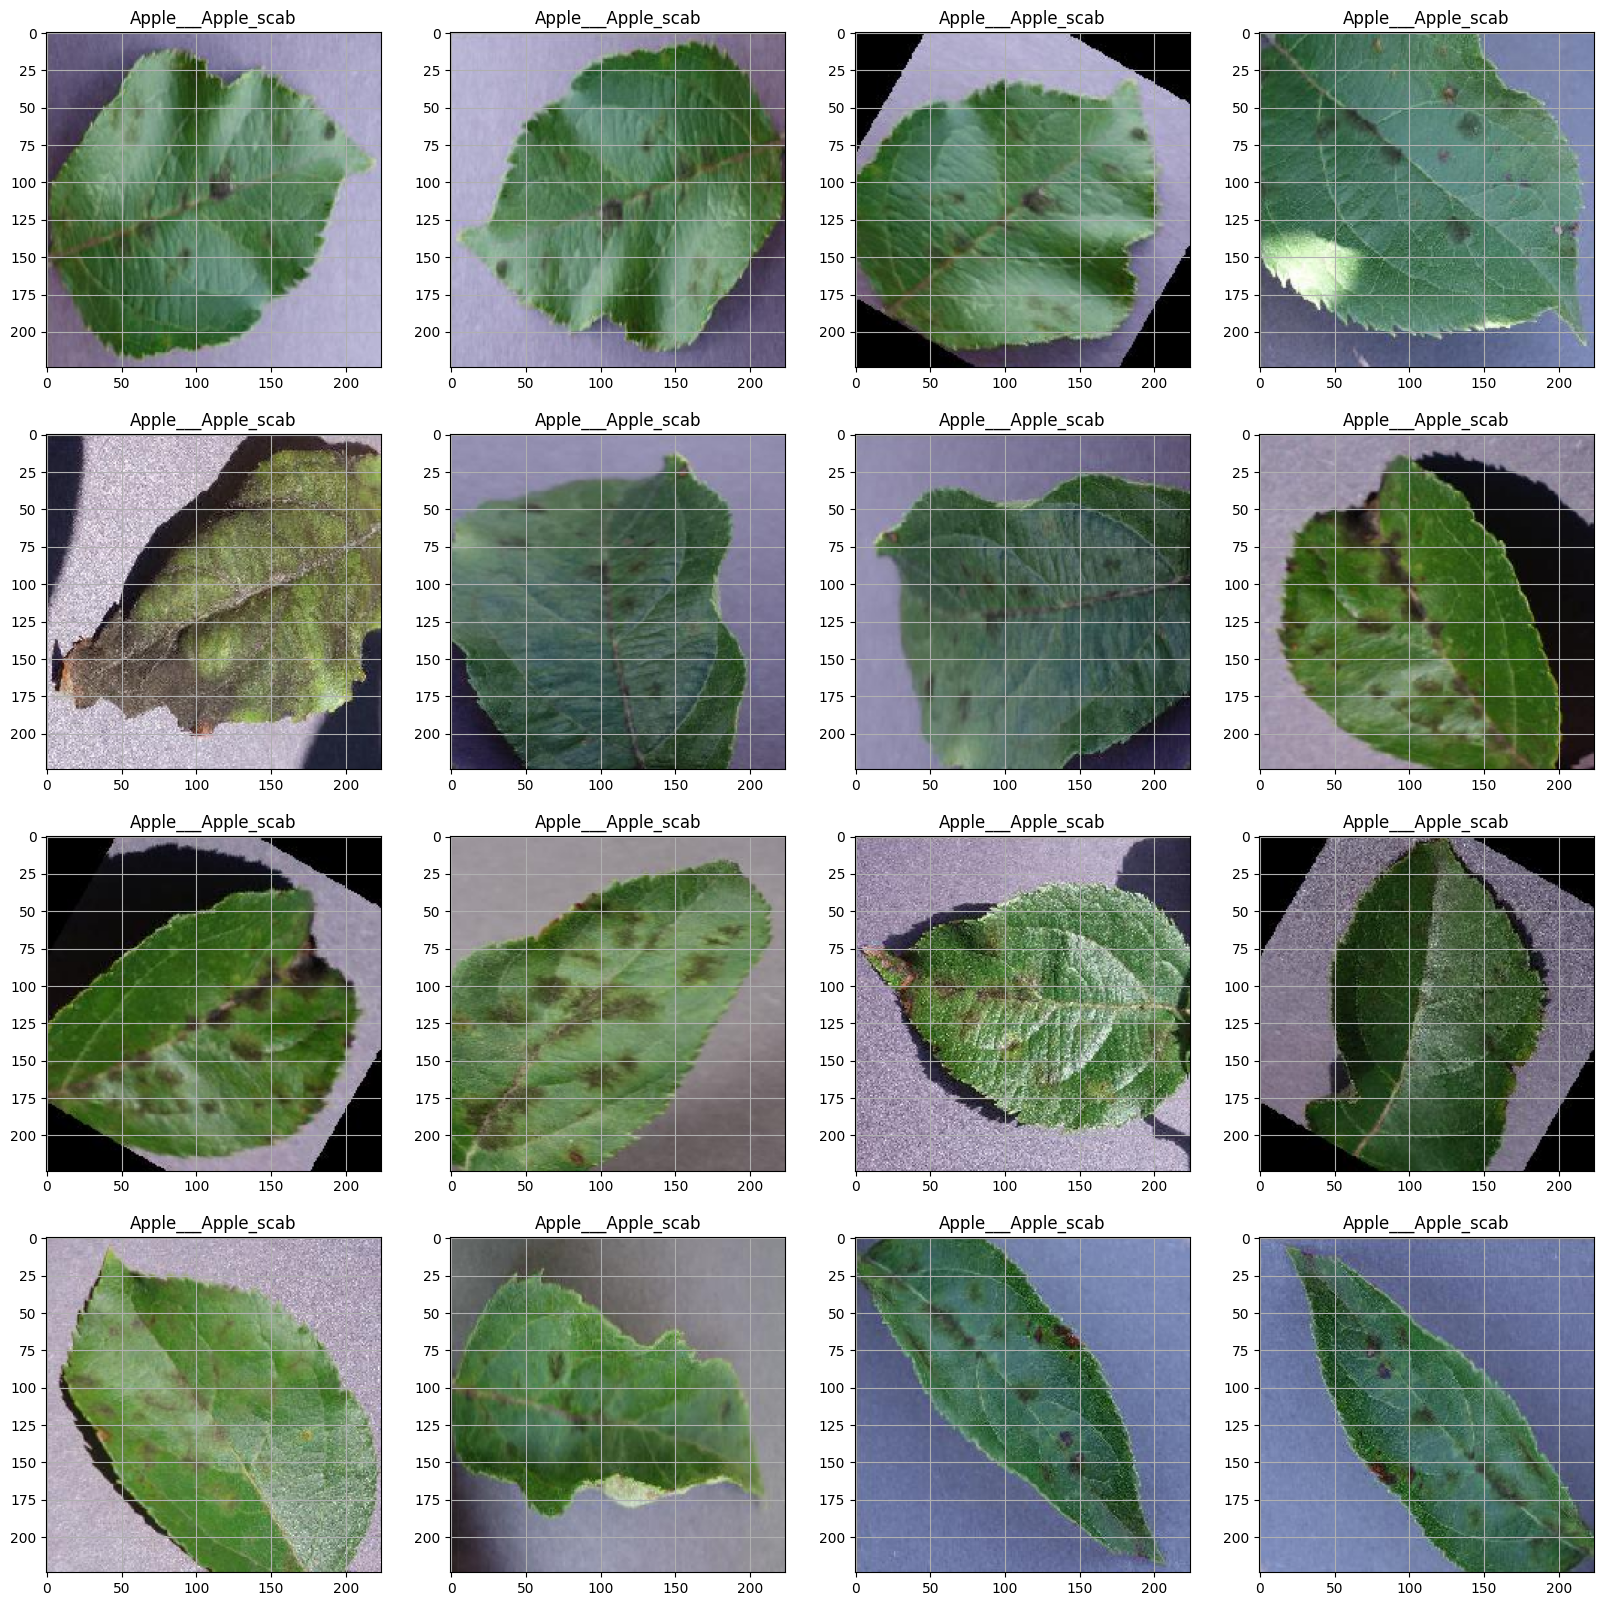

In [ ]:
#let's display some images from validation set

classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        #plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break    #to stop the loop after displaying one batch of images from the training set

In [ ]:
# Model definition

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()  # To build NN

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))   #flatten layer - to convert into 1d vector

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  #output layer


In [ ]:
# The model’s summary() method displays all the model’s layers
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True,verbose=1)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [ ]:
#Compiling the model and finding metrics
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall",])


In [ ]:
#Train the model now

In [ ]:
history = model.fit(train_generator,
                    epochs          = 6,
                  #  batch_size=128,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2538 - loss: 2.7206 - precision: 0.6639 - recall: 0.1146
Epoch 1: val_loss improved from inf to 1.17254, saving model to best_model.keras
495/495 ━━━━━━━━━━━━━━━━━━━━ 908s 2s/step - accuracy: 0.2541 - loss: 2.7192 - precision: 0.6641 - recall: 0.1149 - val_accuracy: 0.6340 - val_loss: 1.1725 - val_precision: 0.7770 - val_recall: 0.5121 - learning_rate: 0.0010
Epoch 2/6
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7147 - loss: 0.9194 - precision: 0.8226 - recall: 0.6190
Epoch 2: val_loss improved from 1.17254 to 0.62809, saving model to best_model.keras
495/495 ━━━━━━━━━━━━━━━━━━━━ 853s 2s/step - accuracy: 0.7148 - loss: 0.9192 - precision: 0.8226 - recall: 0.6191 - val_accuracy: 0.7967 - val_loss: 0.6281 - val_precision: 0.8484 - val_recall: 0.7508 - learning_rate: 0.0010
Epoch 3/6
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8294 - loss: 0.5307 - precision: 0.8783 - recall: 0.7897
Epoch 3: val_loss improved from 0

In [ ]:
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall =history.history['recall']
val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

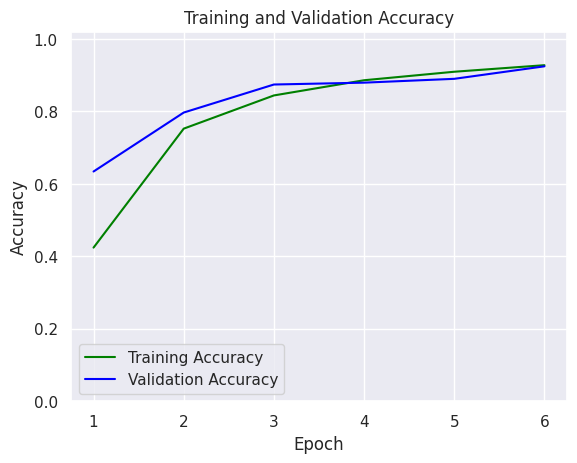

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

138/138 ━━━━━━━━━━━━━━━━━━━━ 44s 321ms/step - accuracy: 0.9144 - loss: 0.2534 - precision: 0.9279 - recall: 0.9059
Loss     :  0.20569182932376862
Accuracy :  0.9294900894165039
Precision  :  0.9393869042396545
Recall :  0.9225472211837769


In [ ]:
model.save('best_model.keras')

In [1]:
# !nvidia-smi